## The goal of this homework is to create a regression model for predicting housing prices (column `'median_house_value'`).

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from os.path import exists
%matplotlib inline

## EDA

### Load the data.


In [2]:
url = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv"
my_file_path = "./housing.csv"

if exists(my_file_path) :
    print (my_file_path, "is exists")
else :
    #Get the link or url
    housing = requests.get(url, allow_redirects=True)
    #Save the content with name
    open('housing.csv', 'wb').write(housing.content)

./housing.csv is exists


In [3]:
df = pd.read_csv(my_file_path)

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

### Look at the `median_house_value` variable. Does it have a long tail? 

In [8]:
#df['median_house_value'].head()

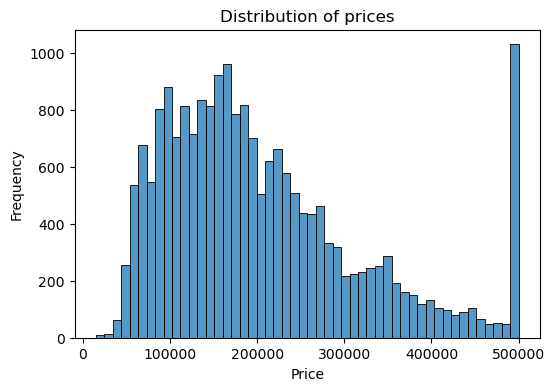

In [6]:
#Distribution of median_house_value
plt.figure(figsize=(6, 4))

sns.histplot(df.median_house_value, bins=50)
# bins : how many bar we should have
#sns.histplot(df.msrp, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

## Preparing the dataset 
For this homework, we only want to use a subset of data. 


### First, keep only the records where `ocean_proximity` is either `'<1H OCEAN'` or `'INLAND'`

In [7]:
df_1Hocean_inland = df.loc[ (df['ocean_proximity'] =='<1H OCEAN') | (df['ocean_proximity'] =='INLAND')   ]
df_1Hocean_inland

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1H OCEAN
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,<1H OCEAN
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


### Next, use only the following columns:

* `'latitude'`,
* `'longitude'`,
* `'housing_median_age'`,
* `'total_rooms'`,
* `'total_bedrooms'`,
* `'population'`,
* `'households'`,
* `'median_income'`,
* `'median_house_value'`


In [8]:
base = [
    'latitude', 
    'longitude', 
    'housing_median_age',
    'total_rooms', 
    'total_bedrooms', 
    'population', 
    'households', 
    'median_income',
    'median_house_value' 
    ]

#df_base = df[base]
#df_base
#df.loc[ (df['ocean_proximity'] =='<1H OCEAN') | (df['ocean_proximity'] =='INLAND')   ]
df_base = df_1Hocean_inland[base]
df_base

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0
...,...,...,...,...,...,...,...,...,...
20635,39.48,-121.09,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,39.49,-121.21,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,39.43,-121.22,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,39.43,-121.32,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


## Question 1
There's one feature with missing values. What is it?

In [9]:
na_base = df_base.isna().sum().sort_values(ascending=False)
cols_miss_values = na_base[na_base > 0]
cols_miss_values

total_bedrooms    157
dtype: int64

## Question 2
What's the median (50% percentile) for variable `'population'`?

In [10]:
df_base['population'].median()

1195.0

### Prepare and split the dataset


#### Shuffle  and Split
* Shuffle the dataset (the filtered one you created above), use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.

In [11]:
np.random.seed(42)

n = len(df_base)

# 20% : validation set
n_val = int(0.2 * n)

#20% : testing set
n_test = int(0.2 * n)

#60% or the reste : training set
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df_base.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

df_train.reset_index(drop=True)
df_val.reset_index(drop=True)
df_test.reset_index(drop=True)

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,33.90,-117.44,23.0,4487.0,754.0,2609.0,778.0,4.2788,148700.0
1,38.03,-121.65,28.0,3144.0,694.0,1095.0,482.0,3.4402,192400.0
2,37.25,-121.85,20.0,3773.0,624.0,1965.0,607.0,5.4939,241200.0
3,32.78,-116.97,35.0,1113.0,236.0,681.0,246.0,2.9784,136400.0
4,37.97,-121.32,43.0,2453.0,490.0,1093.0,438.0,2.9107,88800.0
...,...,...,...,...,...,...,...,...,...
3132,34.15,-118.14,41.0,1256.0,407.0,855.0,383.0,1.9923,500001.0
3133,37.40,-121.86,19.0,4043.0,764.0,2196.0,708.0,6.1504,268400.0
3134,34.07,-118.15,52.0,1983.0,344.0,887.0,331.0,3.2875,234400.0
3135,36.78,-119.81,37.0,1965.0,364.0,796.0,335.0,3.6250,83400.0


#### Apply the log transformation to the `median_house_value` variable using the `np.log1p()` function.

In [12]:
y_train_orig = df_train.median_house_value.values
y_val_orig = df_val.median_house_value.values
y_test_orig = df_test.median_house_value.values

y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

## Question 3

    * We need to deal with missing values for the column from Q1.
    * We have two options: fill it with 0 or with the mean of this variable.
    * Try both options. For each, train a linear regression model without regularization using the code * from the lessons.
    * For computing the mean, use the training only!
    * Use the validation dataset to evaluate the models and compare the RMSE of each option.
    * Round the RMSE scores to 2 decimal digits using round(score, 2)
    * Which option gives better RMSE?


In [13]:
base = [
    'latitude', 
    'longitude', 
    'housing_median_age',
    'total_rooms', 
    'total_bedrooms', 
    'population', 
    'households', 
    'median_income',    
    ]
#base

In [14]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

Fill na with 0

In [15]:
def prepare_X_na0(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [16]:
X_train1 = prepare_X_na0(df_train)
w1_0, w1 = train_linear_regression(X_train1, y_train)

In [18]:
y_train1 = y_train
y_train1

array([11.16196275, 12.32163544, 12.4718963 , ..., 13.12236738,
       12.11888489, 12.52924613])

In [21]:
y_pred1 = w1_0 + X_train1.dot(w1)

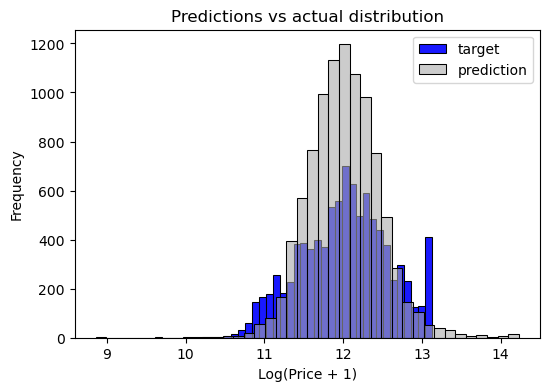

In [22]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='blue', alpha=0.9, bins=40)
sns.histplot(y_pred1, label='prediction', color='#aaaaaa', alpha=0.6, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [23]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [24]:
#rmse(y_train, y_pred2)   # 
( rmse(y_train1, y_pred1)).round(2)

0.34

    Validation

In [25]:
#Validation
X_val1 = prepare_X_na0(df_val)
y_pred1_val1 = w1_0 + X_val1.dot(w1)
y_pred1_val1

array([11.71830182, 12.47794996, 11.84203817, ..., 12.40213723,
       12.06030557, 12.06854096])

In [26]:
( rmse(y_val, y_pred1_val1)).round(2)

0.34

 #### Fillna with the mean of this variable

In [27]:
def prepare_X_mean(df):
    df_num = df[base]
    #df_num = df_num.fillna(0)   
    df_num['total_bedrooms'] = df_num['total_bedrooms'].fillna(df_num['total_bedrooms'].mean())
    X = df_num.values
    return X

In [28]:
X_train2 = prepare_X_mean(df_train)
w2_0, w2 = train_linear_regression(X_train2, y_train)

In [29]:
y_train2 = y_train
y_train2

array([11.16196275, 12.32163544, 12.4718963 , ..., 13.12236738,
       12.11888489, 12.52924613])

In [30]:
y_pred2 = w2_0 + X_train2.dot(w1)
y_pred2

array([11.36613594, 12.02568569, 12.33564365, ..., 12.79043982,
       11.80788318, 11.99325967])

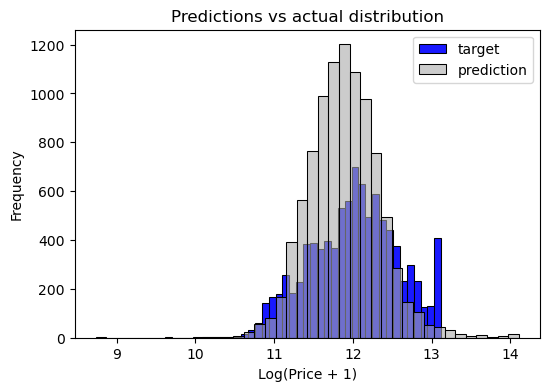

In [31]:

plt.figure(figsize=(6, 4))

sns.histplot(y_train2, label='target', color='blue', alpha=0.9, bins=40)
sns.histplot(y_pred2, label='prediction', color='#aaaaaa', alpha=0.6, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [32]:
( rmse(y_train2, y_pred2)).round(2)

0.36

Validation

In [33]:
X_val2 = prepare_X_mean(df_val)
y_pred2_val2 = w2_0 + X_val2.dot(w2)
y_pred2_val2

array([11.71462282, 12.47428049, 11.84127314, ..., 12.39294053,
       12.05541417, 12.06224727])

In [34]:
( rmse(y_val, y_pred2_val2)).round(2)

0.34

* For computing the mean, use the training only!

* Use the validation dataset to evaluate the models and compare the RMSE of each option.

* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?

Options:
- Both are equally good

## Question 4

    Now let's train a regularized linear regression.
    For this question, fill the NAs with 0.
    Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
    Use RMSE to evaluate the model on the validation dataset.
    Round the RMSE scores to 2 decimal digits.
    Which r gives the best RMSE?

If there are multiple options, select the smallest r.

Options:

    0
    0.000001
    0.001
    0.0001


## Tuning the model

In [35]:
def train_linear_regression_reg(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [36]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [37]:

for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = (rmse(y_val, y_pred)).round(2)
    
    print(r, w0, score)



0 -9.763249477680878 0.34
1e-06 -9.76322883054181 0.34
0.0001 -9.761185235173027 0.34
0.001 -9.742646249273005 0.34
0.01 -9.561056192855482 0.34
0.1 -8.058889769678107 0.34
1 -3.1331542784593776 0.34
5 -0.8410867975450146 0.35
10 -0.4381172315539199 0.35


The smallest : 0.0001

## Question 5

    We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
    Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
    For each seed, do the train/validation/test split with 60%/20%/20% distribution.
    Fill the missing values with 0 and train a model without regularization.
    For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
    What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
    Round the result to 3 decimal digits (round(std, 3))

What's the value of std?

    0.5
    0.05
    0.005
    0.0005

    Note: Standard deviation shows how different the values are. If it's low, then all values are approximately the same. If it's high, the values are different. If standard deviation of scores is low, then our model is stable.


In [40]:
score1_array = []
score2_array = []

for x in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] :    
    np.random.seed(x)

    n = len(df_base)

    # 20% : validation set
    n_val = int(0.2 * n)

    #20% : testing set
    n_test = int(0.2 * n)

    #60% or the reste : training set
    n_train = n - (n_val + n_test)

    idx = np.arange(n)
    np.random.shuffle(idx)

    df_shuffled = df_base.iloc[idx]

    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()

    df_train.reset_index(drop=True)
    df_val.reset_index(drop=True)
    df_test.reset_index(drop=True)
    
    
    
    X_train = prepare_X_na0(df_train)
    w_0, w = train_linear_regression(X_train, y_train)
    #y_train
    y_pred = w_0 + X_train.dot(w)
    #print( y_pred)
    
    score1 = rmse(y_train, y_pred)
    print('score1 :', score1.round(3)  )
    #score1_array.append(score1)
    #print('score1_array :', score1_array  )
    
    
    
    #Validation
    X_val = prepare_X_na0(df_val)
    y_pred1_val1 = w1_0 + X_val1.dot(w1)
    y_pred1_val1

    score2 = rmse(y_val, y_pred1_val1)   
    #score2_array.append(score1)
    
    #print( (np.std(rmse2)).round(3))
    print('score2 :', score2.round(3)   )
    #print('rmse1 :', rmse1, 'rmse2 :', rmse2)
    



score1 : 0.564
score2 : 0.341
score1 : 0.564
score2 : 0.341
score1 : 0.564
score2 : 0.341
score1 : 0.564
score2 : 0.341
score1 : 0.564
score2 : 0.341
score1 : 0.564
score2 : 0.341
score1 : 0.564
score2 : 0.341
score1 : 0.564
score2 : 0.341
score1 : 0.564
score2 : 0.341
score1 : 0.564
score2 : 0.341


## Question 6

    Split the dataset like previously, use seed 9.
    Combine train and validation datasets.
    Fill the missing values with 0 and train a model with r=0.001.
    What's the RMSE on the test dataset?

Options:

    0.13
    0.23
    0.33
    0.43


In [41]:
np.random.seed(9)
df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)
X_full_train = prepare_X(df_full_train)
X_full_train

array([[  32.82  , -117.05  ,   16.    , ..., 1684.    ,  701.    ,
           4.2312],
       [  33.91  , -118.    ,   19.    , ..., 2374.    ,  753.    ,
           5.979 ],
       [  37.25  , -121.96  ,   35.    , ...,  484.    ,  174.    ,
           6.1648],
       ...,
       [  32.85  , -116.99  ,   32.    , ..., 3025.    ,  948.    ,
           4.0931],
       [  38.48  , -122.68  ,   15.    , ...,  716.    ,  259.    ,
           5.3409],
       [  37.29  , -121.95  ,   30.    , ..., 1834.    ,  824.    ,
           3.4505]])

In [42]:
y_full_train = np.concatenate([y_train, y_val])
#prepare_X_na0
X_full_train = prepare_X_na0(df_train)
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)


ValueError: shapes (9,9413) and (12550,) not aligned: 9413 (dim 1) != 12550 (dim 0)

In [43]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score



11.957733334208623

In [44]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [45]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score

11.957733334208623